## Final Project

Overall, I will be looking for the following:

* Introduction to a research question (what is the background on this subject; why does the question matter; who will it help; how has been attempted to be answered)
* Incorporation of at five research methods / concepts learned in this class and a discussion of how these were incorporated
* Analysis to answer your data question

Your discussion should include:

* What from the class did you use in this project and why might it be useful for research projects like this?  What are the advantages and disadvantages?  
* Were there any assumptions or transformations needed? 
* How much does your analysis attain the FAIR principles? For example, what is the ability to automate and reproduce your analysis (if the file input were to change, could this analysis be reproduced and how easily?)  - how will someone else reproduce this analysis?  Is the data stored somewhere?  Can I reproduce the figures easily?

Project (100 points)

Website / Content (75 points)

Problem introduced, relevancy explained, question is clear (25 points)

Reproducible analysis is present and clear (25 points)

Project describes integration of class concepts and discusses why analysis was chosen  (25 points)



## Introduction to a research question

Farm stressors are one of the main causes of farm injuries. Identifying stressful events helps to understand and find the best procedure to reduce the chance of injury. Later, the farmers can consult with health and safety specialists, and they will help give them some recommendations to diminish the risk of an injury and stay healthy.
One of the most stressful events was when a farmer lost a beloved person, child, or spouse. The study aims to identify if a child or spouse's death, injury, or death is stressful. 
A survey with 62 life activities or events was sent to the farmers in 2004. Farmers rated them from 1 (less stressful) to 100 (more stressful). The marriage event was set as the baseline (50). In this case, marriage was considered to be neither stressful nor stress-free. If one event is more stressful than marriage, the farmer should input (51 to 100). On the other hand, if it is less stressful than marriage, the farmer could choose between 1 to 49. 
For this study, Python was the tool to help to answer the following questions:
* Does the death or disabling injury stressful or not stressful?
* Does the death of a spouse stressful or not stressful?
* Does injury of a family stressful or not stressful?
* Does injury to yourself stressful or not stressful?
* Does the death of a child stressful or not stressful?

For the analysis, I considered that "0" is neither stressful nor stress-free (neutral), "1" means no stress, and "2" means stress.

## Incorporation of five research methods/concepts
Comments, advantages, and disadvantages of the research methods and concepts

In [1]:
!pwd

/Users/tammyhirakawa/Desktop/7 Spring 2023/ABE 516X/Main Project


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE

# 'U:/ABE 516X/Main Project/FS04PT1_farmtype_with title.csv'
# '/Users/tammyhirakawa/Desktop/7 Spring 2023/ABE 516X/Main Project/FS04PT1_farmtype_with title.csv'

dataset = pd.read_csv('FS04PT1_farmtype_with title.csv')
dataset

Identification code  File number  State Beginning or ceasing work  \
0                       4            1     19                        60   
1                       5            1     19                        60   
2                       6            1     19                        70   
3                       7            1     19                        80   
4                      12            1     19                        75   
...                   ...          ...    ...                       ...   
1338                 6491            1     19                        70   
1339                 6494            1     19                        60   
1340                 6496            1     19                       100   
1341                 6498            1     19                        40   
1342                 6499            1     19                        50   

     Working with livestock Transporting agricultural  \
0                        25                        50   
1                        50                        55   
2                        60                        90   
3                        10                        30   
4                        55                        60   
...                     ...                       ...   
1338                     30                        60   
1339                     50                        40   
1340                     10                        10   
1341                     60                        60   
1342                     90                        60   

     Death or disabling injury West Nile virus Assigning hazardous tasks  \
0                           60              60                        70   
1                           57              70                        60   
2                           85              95                        70   
3                           55              10                        20   
4                           70              80                        65   
...                        ...             ...                       ...   
1338                        65              60                        85   
1339                        60              50                        70   
1340                        10              10                        10   
1341                        60              60                        70   
1342                       100              40                        50   

     Death of a spouse  ...                    Other farm type-specify   \
0                   90  ...                                               
1                   85  ...                                               
2                  100  ...                                               
3                       ...                                               
4                  100  ...  HONEY BEES                                   
...                ...  ...                                         ...   
1338                95  ...                                               
1339                95  ...                                               
1340                10  ...                                               
1341                95  ...                                               
1342               100  ...                                               

     Farm occupation District   County  Survey Year Death Stress  \
0                  2         60      45        2004            2   
1                  3         10      59        2004            2   
2                  1         10     141        2004            2   
3                  1         90     183        2004            2   
4                  2         40      85        2004            2   
...              ...        ...     ...         ...          ...   
1338               1         10     151        2004            1   
1339               1         30      43        2004           

In [3]:
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

## Erase unnecessary columns
For the project, I did not need all the columns, and it was necessary to erase them for not to make noise to the analysis (i.e., Identification code, file number, state)



In [4]:
dataset = dataset.drop('Identification code', axis=1)
dataset = dataset.drop('File number', axis=1)
dataset = dataset.drop('State', axis=1)
dataset = dataset.drop('Race', axis=1)
dataset = dataset.drop('Other race-specify', axis=1)
dataset = dataset.drop('Farm type ', axis=1)
dataset = dataset.drop('Other farm type-specify ', axis=1)
dataset = dataset.drop('Farm occupation', axis=1)
dataset = dataset.drop('District  ', axis=1)
dataset = dataset.drop('County ', axis=1)
dataset = dataset.drop('Survey Year', axis=1)

dataset

Beginning or ceasing work Working with livestock  \
0                           60                     25   
1                           60                     50   
2                           70                     60   
3                           80                     10   
4                           75                     55   
...                        ...                    ...   
1338                        70                     30   
1339                        60                     50   
1340                       100                     10   
1341                        40                     60   
1342                        50                     90   

     Transporting agricultural Death or disabling injury West Nile virus  \
0                           50                        60              60   
1                           55                        57              70   
2                           90                        85              95   
3                           30                        55              10   
4                           60                        70              80   
...                        ...                       ...             ...   
1338                        60                        65              60   
1339                        40                        60              50   
1340                        10                        10              10   
1341                        60                        60              60   
1342                        60                       100              40   

     Assigning hazardous tasks Death of a spouse Vacation  \
0                           70                90       20   
1                           60                85        1   
2                           70               100       60   
3                           20                         10   
4                           65               100       10   
...                        ...               ...      ...   
1338                        85                95       10   
1339                        70                95       25   
1340                        10                10       10   
1341                        70                95       60   
1342                        50               100       30   

     Increased input prices Access to timely emergency  ...  \
0                        70                         60  ...   
1                        69                         60  ...   
2                        60                         60  ...   
3                        60                         35  ...   
4                        60                         20  ...   
...                     ...                        ...  ...   
1338                     68                         45  ...   
1339                     50                         40  ...   
1340                     90                         10  ...   
1341                     70                         75  ...   
1342                     63                         75  ...   

     Having to file maintain Vertical integration of farm Age Gender  \
0                         80                           60  65      2   
1                         60                           60  72      1   
2                         60                           95  43      2   
3                         40                           60  36      1   
4                         50                           40  50      2   
...                      ...                          ...  ..    ...   
1338                      85                           62  47      1   
1339                      60                           60  49      1   
1340                      10                           10  42      2   
1341                      65                           75  35      1   
1342                      50                           50  56      1   

     Marital status Death Stress Death Spouse Stress

## Check for NA values
I eliminated missing and not available values.

In [5]:
dataset.isnull().sum()
dataset.isna().sum()

Beginning or ceasing work    0
Working with livestock       0
Transporting agricultural    0
Death or disabling injury    0
West Nile virus              0
                            ..
Death Stress                 0
Death Spouse Stress          0
Injury of a family Stress    0
Injury to yourself Stress    0
Death Child Stress           0
Length: 70, dtype: int64

In [6]:
dataset = dataset.replace("   ", np.nan)
dataset

Beginning or ceasing work Working with livestock  \
0                           60                     25   
1                           60                     50   
2                           70                     60   
3                           80                     10   
4                           75                     55   
...                        ...                    ...   
1338                        70                     30   
1339                        60                     50   
1340                       100                     10   
1341                        40                     60   
1342                        50                     90   

     Transporting agricultural Death or disabling injury West Nile virus  \
0                           50                        60              60   
1                           55                        57              70   
2                           90                        85              95   
3                           30                        55              10   
4                           60                        70              80   
...                        ...                       ...             ...   
1338                        60                        65              60   
1339                        40                        60              50   
1340                        10                        10              10   
1341                        60                        60              60   
1342                        60                       100              40   

     Assigning hazardous tasks Death of a spouse Vacation  \
0                           70                90       20   
1                           60                85        1   
2                           70               100       60   
3                           20               NaN       10   
4                           65               100       10   
...                        ...               ...      ...   
1338                        85                95       10   
1339                        70                95       25   
1340                        10                10       10   
1341                        70                95       60   
1342                        50               100       30   

     Increased input prices Access to timely emergency  ...  \
0                        70                         60  ...   
1                        69                         60  ...   
2                        60                         60  ...   
3                        60                         35  ...   
4                        60                         20  ...   
...                     ...                        ...  ...   
1338                     68                         45  ...   
1339                     50                         40  ...   
1340                     90                         10  ...   
1341                     70                         75  ...   
1342                     63                         75  ...   

     Having to file maintain Vertical integration of farm Age Gender  \
0                         80                           60  65      2   
1                         60                           60  72      1   
2                         60                           95  43      2   
3                         40                           60  36      1   
4                         50                           40  50      2   
...                      ...                          ...  ..    ...   
1338                      85                           62  47      1   
1339                      60                           60  49      1   
1340                      10                           10  42      2   
1341                      65                           75  35      1   
1342                      50                           50  56      1   

     Marital status Death Stress Death Spouse Stress

In [7]:
dataset = dataset.dropna(axis=0)
dataset

Beginning or ceasing work Working with livestock  \
0                           60                     25   
1                           60                     50   
2                           70                     60   
4                           75                     55   
5                           50                     30   
...                        ...                    ...   
1338                        70                     30   
1339                        60                     50   
1340                       100                     10   
1341                        40                     60   
1342                        50                     90   

     Transporting agricultural Death or disabling injury West Nile virus  \
0                           50                        60              60   
1                           55                        57              70   
2                           90                        85              95   
4                           60                        70              80   
5                           30                        20              15   
...                        ...                       ...             ...   
1338                        60                        65              60   
1339                        40                        60              50   
1340                        10                        10              10   
1341                        60                        60              60   
1342                        60                       100              40   

     Assigning hazardous tasks Death of a spouse Vacation  \
0                           70                90       20   
1                           60                85        1   
2                           70               100       60   
4                           65               100       10   
5                           80               100       30   
...                        ...               ...      ...   
1338                        85                95       10   
1339                        70                95       25   
1340                        10                10       10   
1341                        70                95       60   
1342                        50               100       30   

     Increased input prices Access to timely emergency  ...  \
0                        70                         60  ...   
1                        69                         60  ...   
2                        60                         60  ...   
4                        60                         20  ...   
5                        25                         15  ...   
...                     ...                        ...  ...   
1338                     68                         45  ...   
1339                     50                         40  ...   
1340                     90                         10  ...   
1341                     70                         75  ...   
1342                     63                         75  ...   

     Having to file maintain Vertical integration of farm Age Gender  \
0                         80                           60  65      2   
1                         60                           60  72      1   
2                         60                           95  43      2   
4                         50                           40  50      2   
5                         20                           50  60      2   
...                      ...                          ...  ..    ...   
1338                      85                           62  47      1   
1339                      60                           60  49      1   
1340                      10                           10  42      2   
1341                      65                           75  35      1   
1342                      50                           50  56      1   

     Marital status Death Stress Death Spouse Stress

In [8]:
dataset = dataset.replace(' ', np.nan)
dataset = dataset.dropna(axis=0)
dataset

Beginning or ceasing work Working with livestock  \
0                           60                     25   
1                           60                     50   
2                           70                     60   
4                           75                     55   
5                           50                     30   
...                        ...                    ...   
1338                        70                     30   
1339                        60                     50   
1340                       100                     10   
1341                        40                     60   
1342                        50                     90   

     Transporting agricultural Death or disabling injury West Nile virus  \
0                           50                        60              60   
1                           55                        57              70   
2                           90                        85              95   
4                           60                        70              80   
5                           30                        20              15   
...                        ...                       ...             ...   
1338                        60                        65              60   
1339                        40                        60              50   
1340                        10                        10              10   
1341                        60                        60              60   
1342                        60                       100              40   

     Assigning hazardous tasks Death of a spouse Vacation  \
0                           70                90       20   
1                           60                85        1   
2                           70               100       60   
4                           65               100       10   
5                           80               100       30   
...                        ...               ...      ...   
1338                        85                95       10   
1339                        70                95       25   
1340                        10                10       10   
1341                        70                95       60   
1342                        50               100       30   

     Increased input prices Access to timely emergency  ...  \
0                        70                         60  ...   
1                        69                         60  ...   
2                        60                         60  ...   
4                        60                         20  ...   
5                        25                         15  ...   
...                     ...                        ...  ...   
1338                     68                         45  ...   
1339                     50                         40  ...   
1340                     90                         10  ...   
1341                     70                         75  ...   
1342                     63                         75  ...   

     Having to file maintain Vertical integration of farm Age Gender  \
0                         80                           60  65      2   
1                         60                           60  72      1   
2                         60                           95  43      2   
4                         50                           40  50      2   
5                         20                           50  60      2   
...                      ...                          ...  ..    ...   
1338                      85                           62  47      1   
1339                      60                           60  49      1   
1340                      10                           10  42      2   
1341                      65                           75  35      1   
1342                      50                           50  56      1   

     Marital status Death Stress Death Spouse Stress

In [9]:
print(dataset.isna().any())

Beginning or ceasing work    False
Working with livestock       False
Transporting agricultural    False
Death or disabling injury    False
West Nile virus              False
                             ...  
Death Stress                 False
Death Spouse Stress          False
Injury of a family Stress    False
Injury to yourself Stress    False
Death Child Stress           False
Length: 70, dtype: bool


## Convert columns to numeric
Some columns will remain as string values and others as numeric values.

In [10]:
all_cols = dataset.columns.tolist()
len(all_cols)

70

In [11]:
str_cols=['Gender', 'Marital status', 'Death Stress', 'Death Spouse Stress', 'Death Child Stress']
print(str_cols)
len(str_cols)

['Gender', 'Marital status', 'Death Stress', 'Death Spouse Stress', 'Death Child Stress']


5

In [12]:
num_cols = list(set(all_cols) - set(str_cols))
len(num_cols)

65

In [13]:
dataset[num_cols] = dataset[num_cols].apply(pd.to_numeric)
dataset.dtypes

Beginning or ceasing work    int64
Working with livestock       int64
Transporting agricultural    int64
Death or disabling injury    int64
West Nile virus              int64
                             ...  
Death Stress                 int64
Death Spouse Stress          int64
Injury of a family Stress    int64
Injury to yourself Stress    int64
Death Child Stress           int64
Length: 70, dtype: object

In [14]:
print(dataset.dtypes)

Beginning or ceasing work    int64
Working with livestock       int64
Transporting agricultural    int64
Death or disabling injury    int64
West Nile virus              int64
                             ...  
Death Stress                 int64
Death Spouse Stress          int64
Injury of a family Stress    int64
Injury to yourself Stress    int64
Death Child Stress           int64
Length: 70, dtype: object


## There are 62 life events, and it is impossible to graph them all.
I selected my objective variables (Death or disabling injury, death of a spouse, disabling injury of a family, disabling injury to yourself, death of a child) and compared them with other life events. For example, "Working with livestock ."I can confirm that death or injury is more stressful than working with animals. 

In [15]:
feature_names = ['Working with livestock','Death or disabling injury','Death of a spouse','Disabling injury of a family ','Disabling injury to yourself ','Death of a child ']
features = np.array(feature_names)

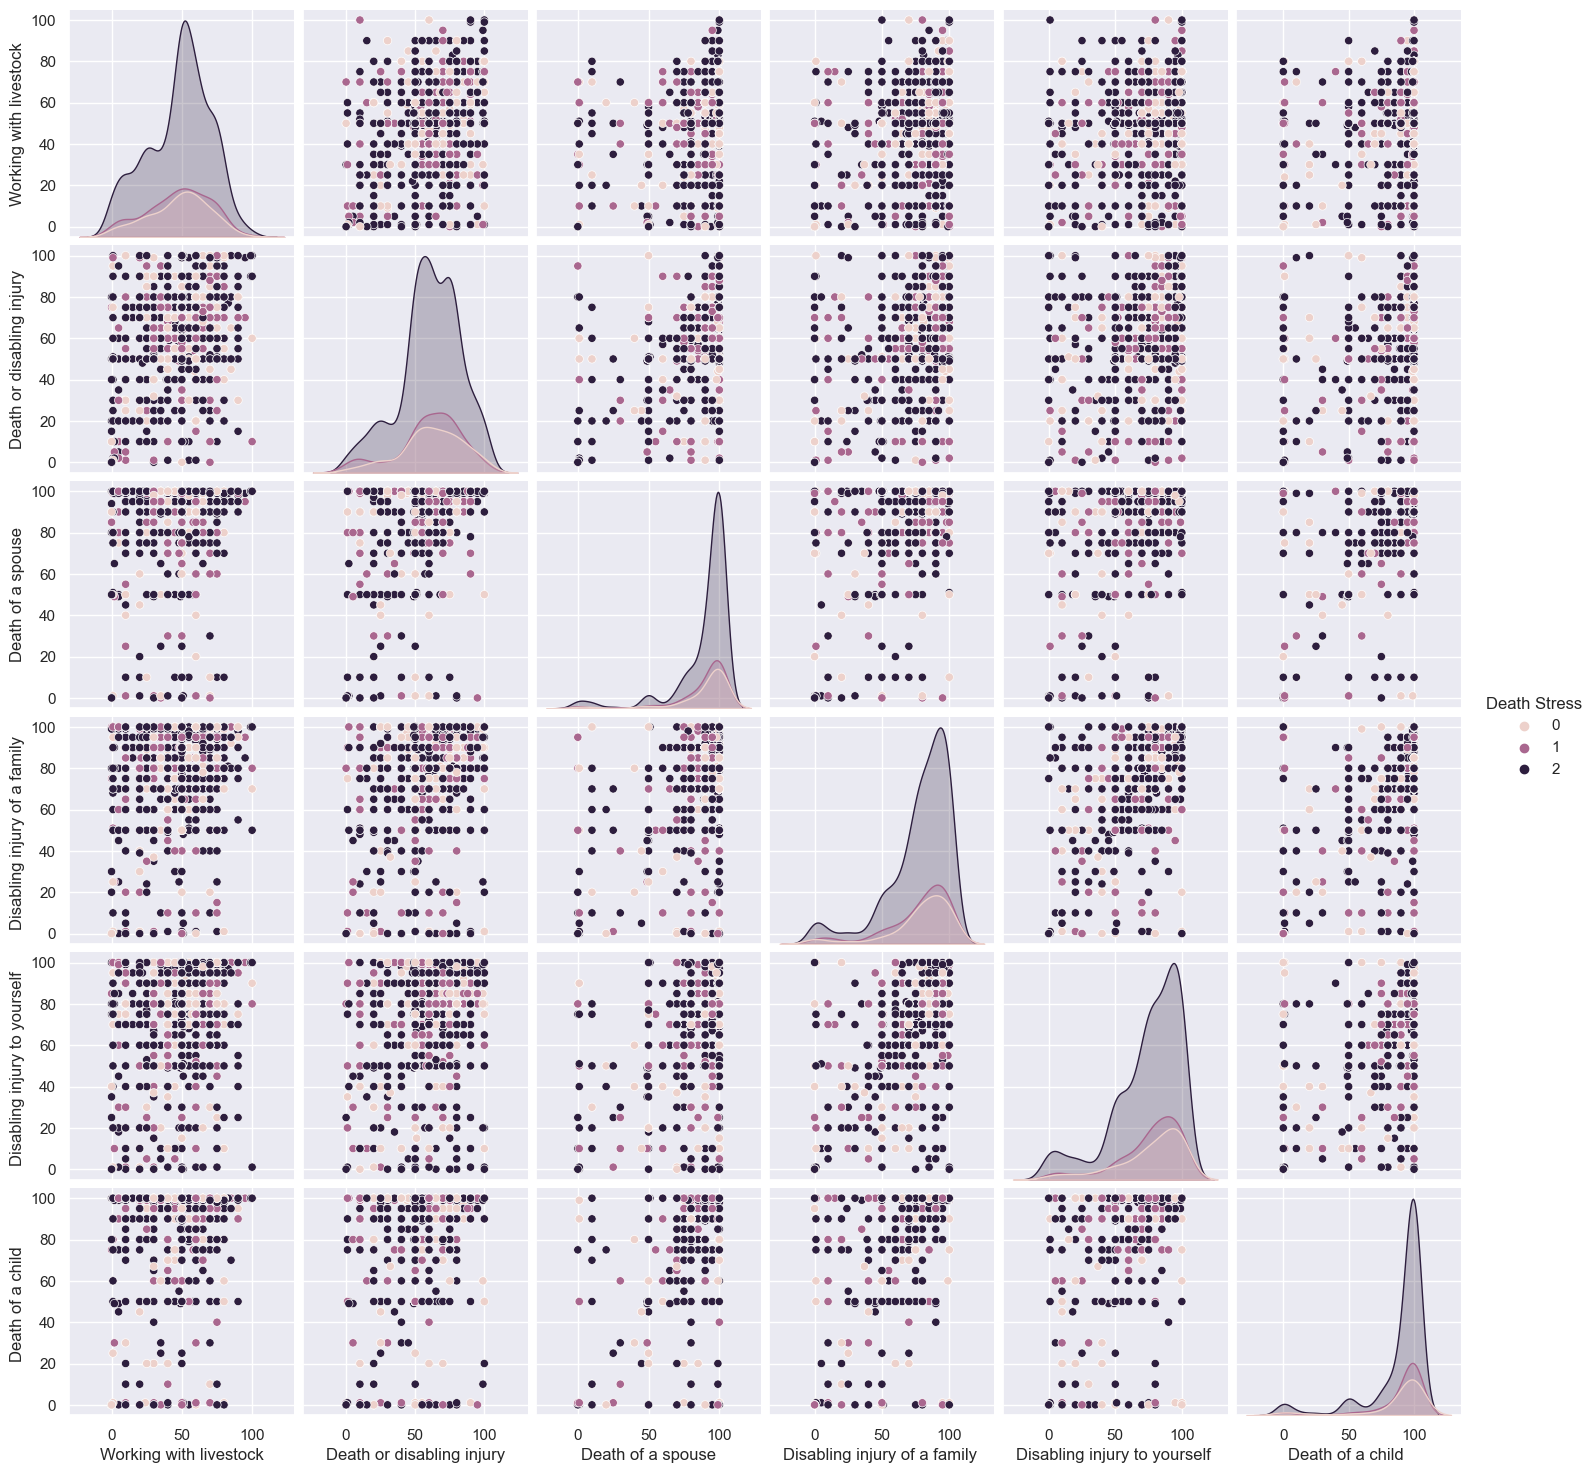

In [16]:
sns.pairplot(dataset, hue = 'Death Stress', vars = feature_names)

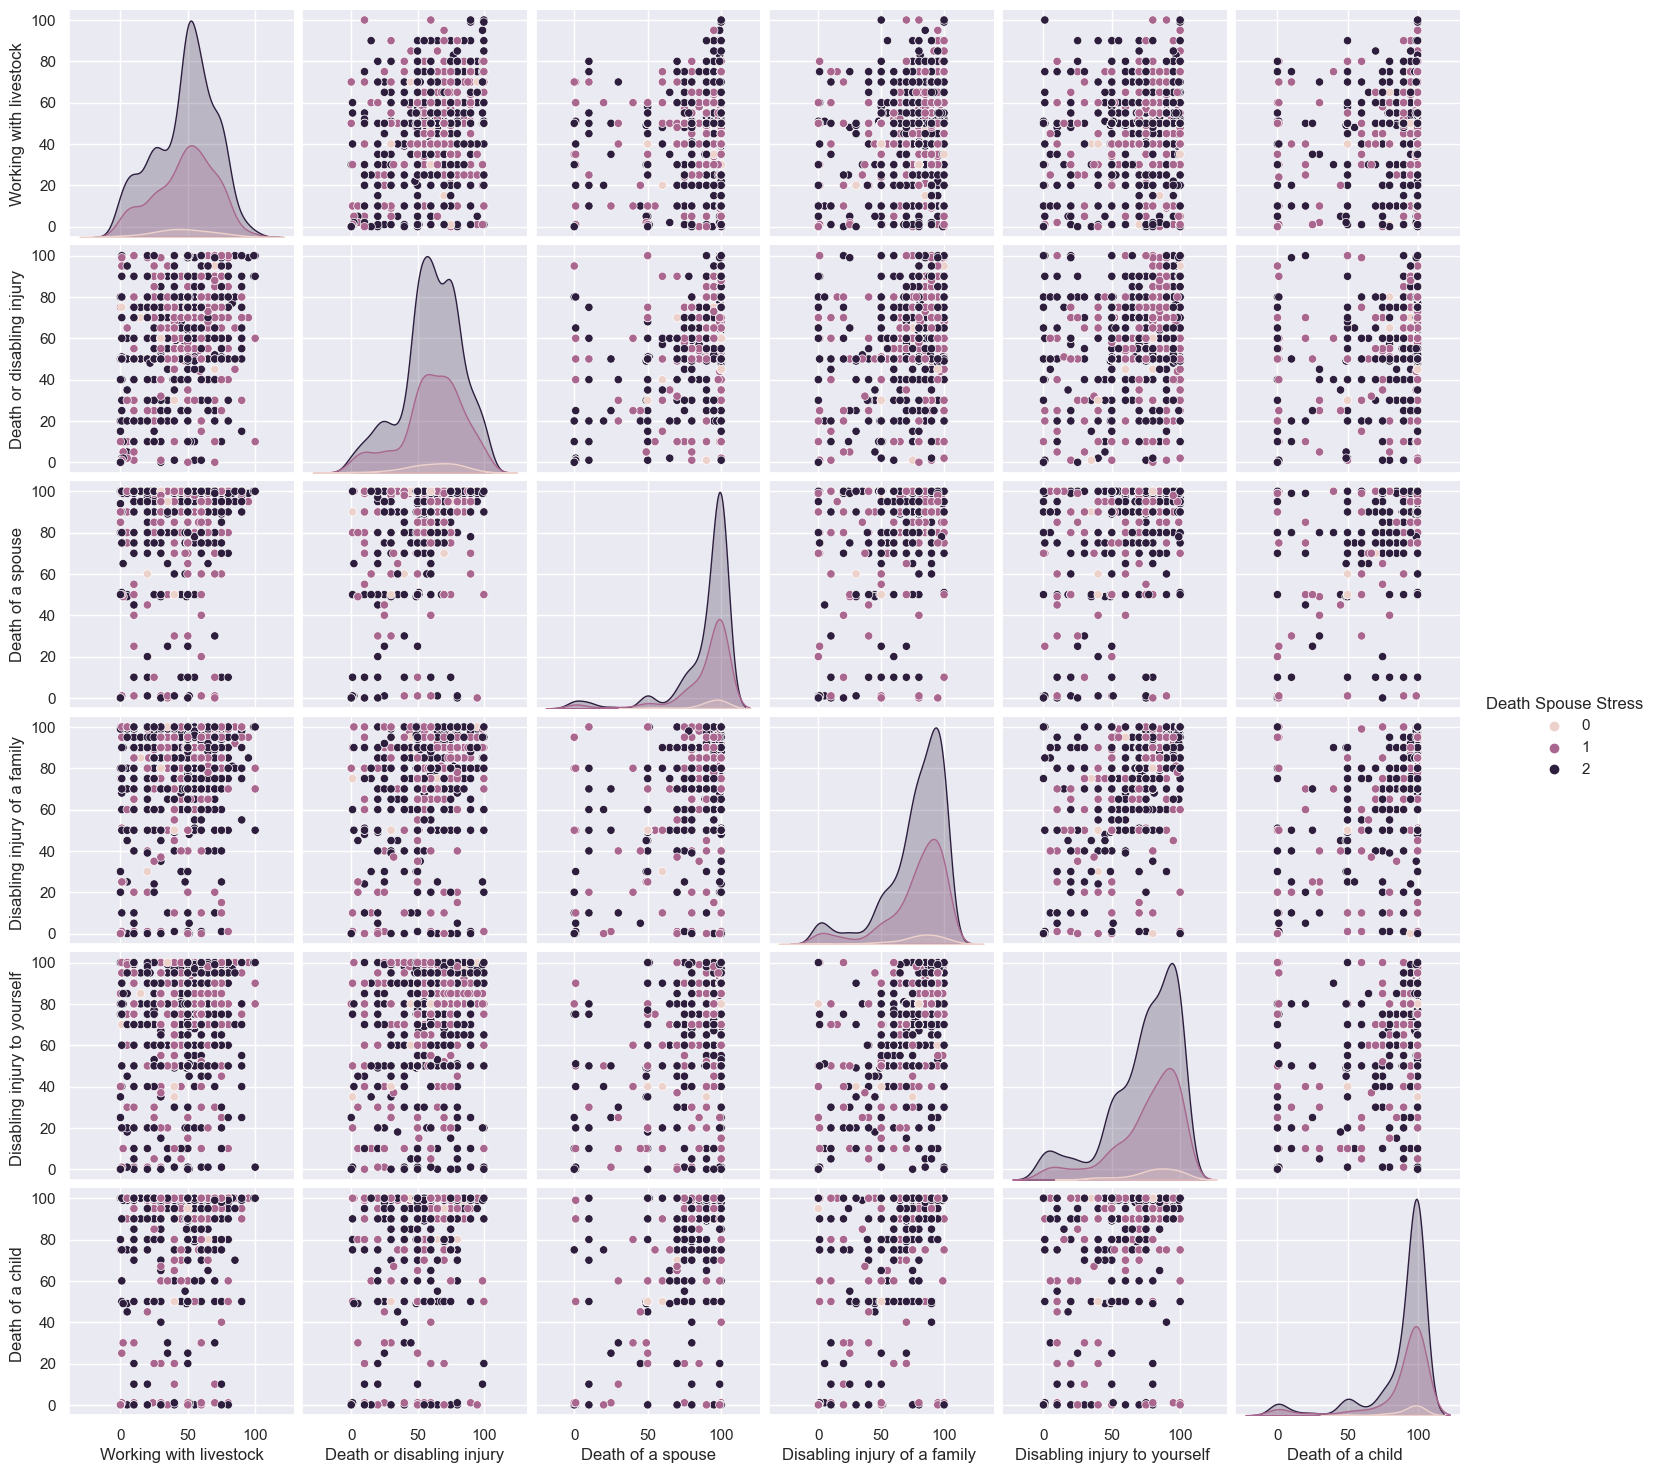

In [17]:
sns.pairplot(dataset, hue = 'Death Spouse Stress', vars = feature_names)

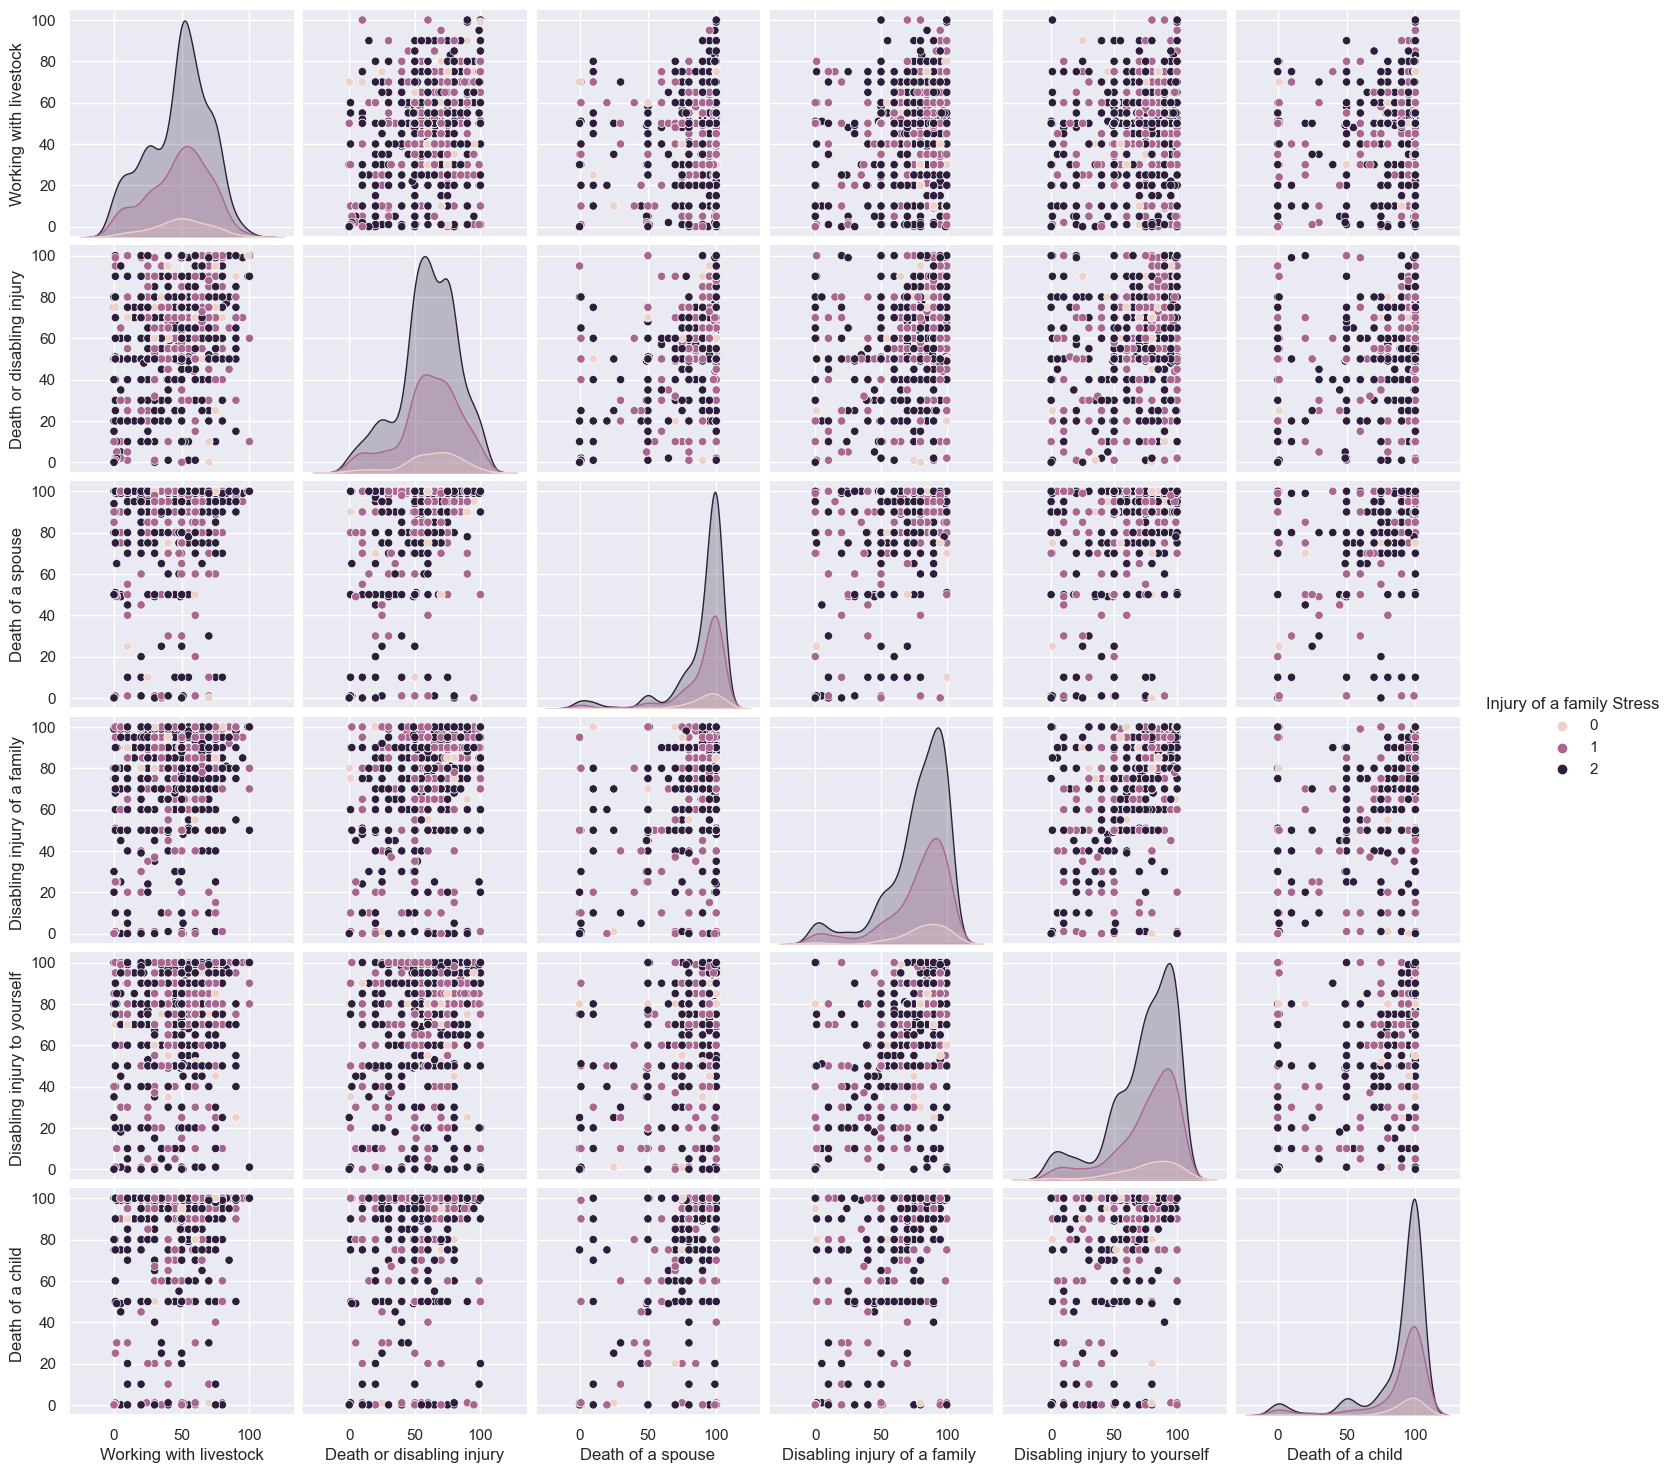

In [18]:
sns.pairplot(dataset, hue = 'Injury of a family Stress', vars = feature_names)

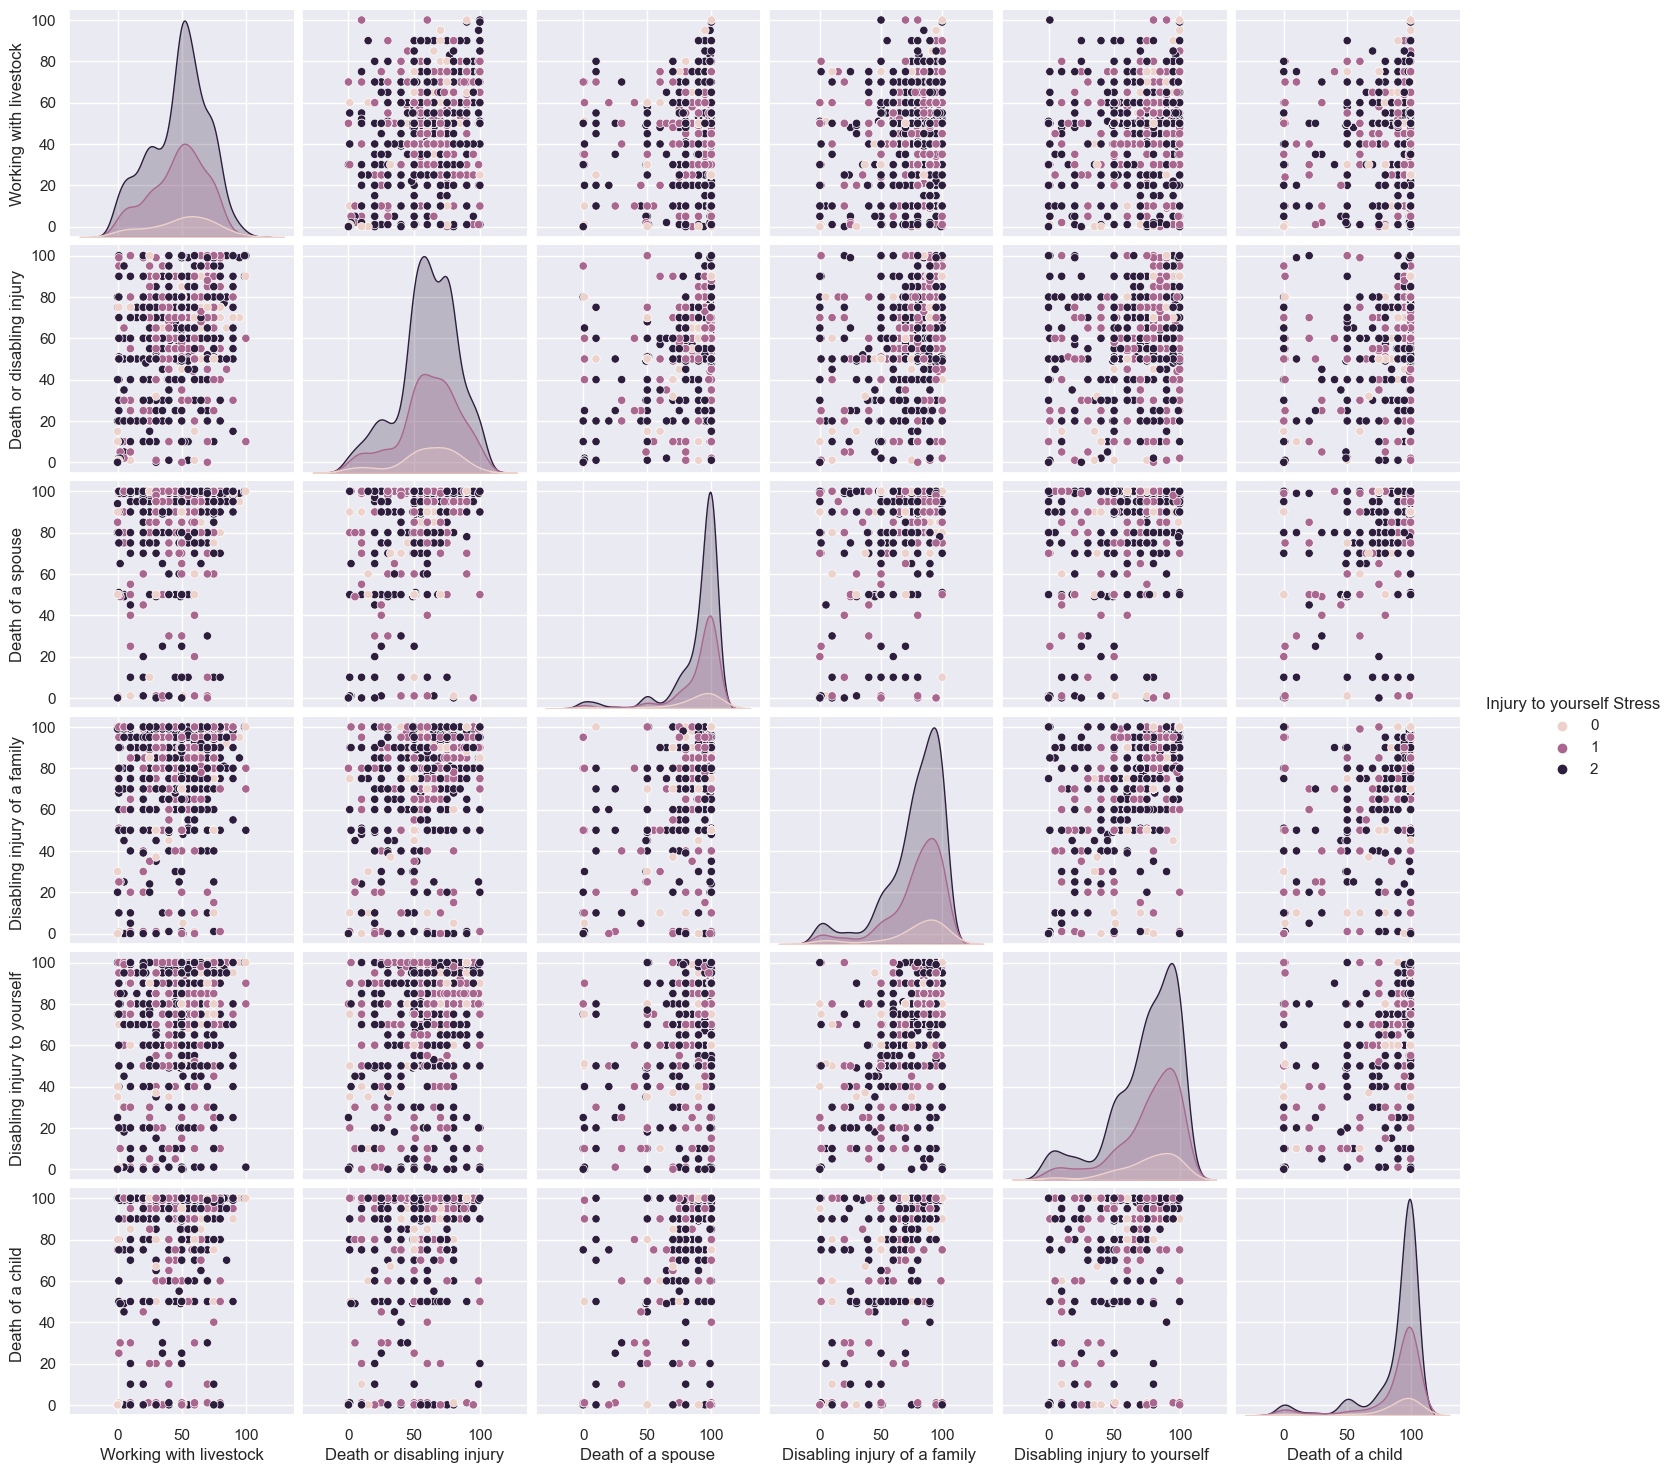

In [19]:
sns.pairplot(dataset, hue = 'Injury to yourself Stress', vars = feature_names)

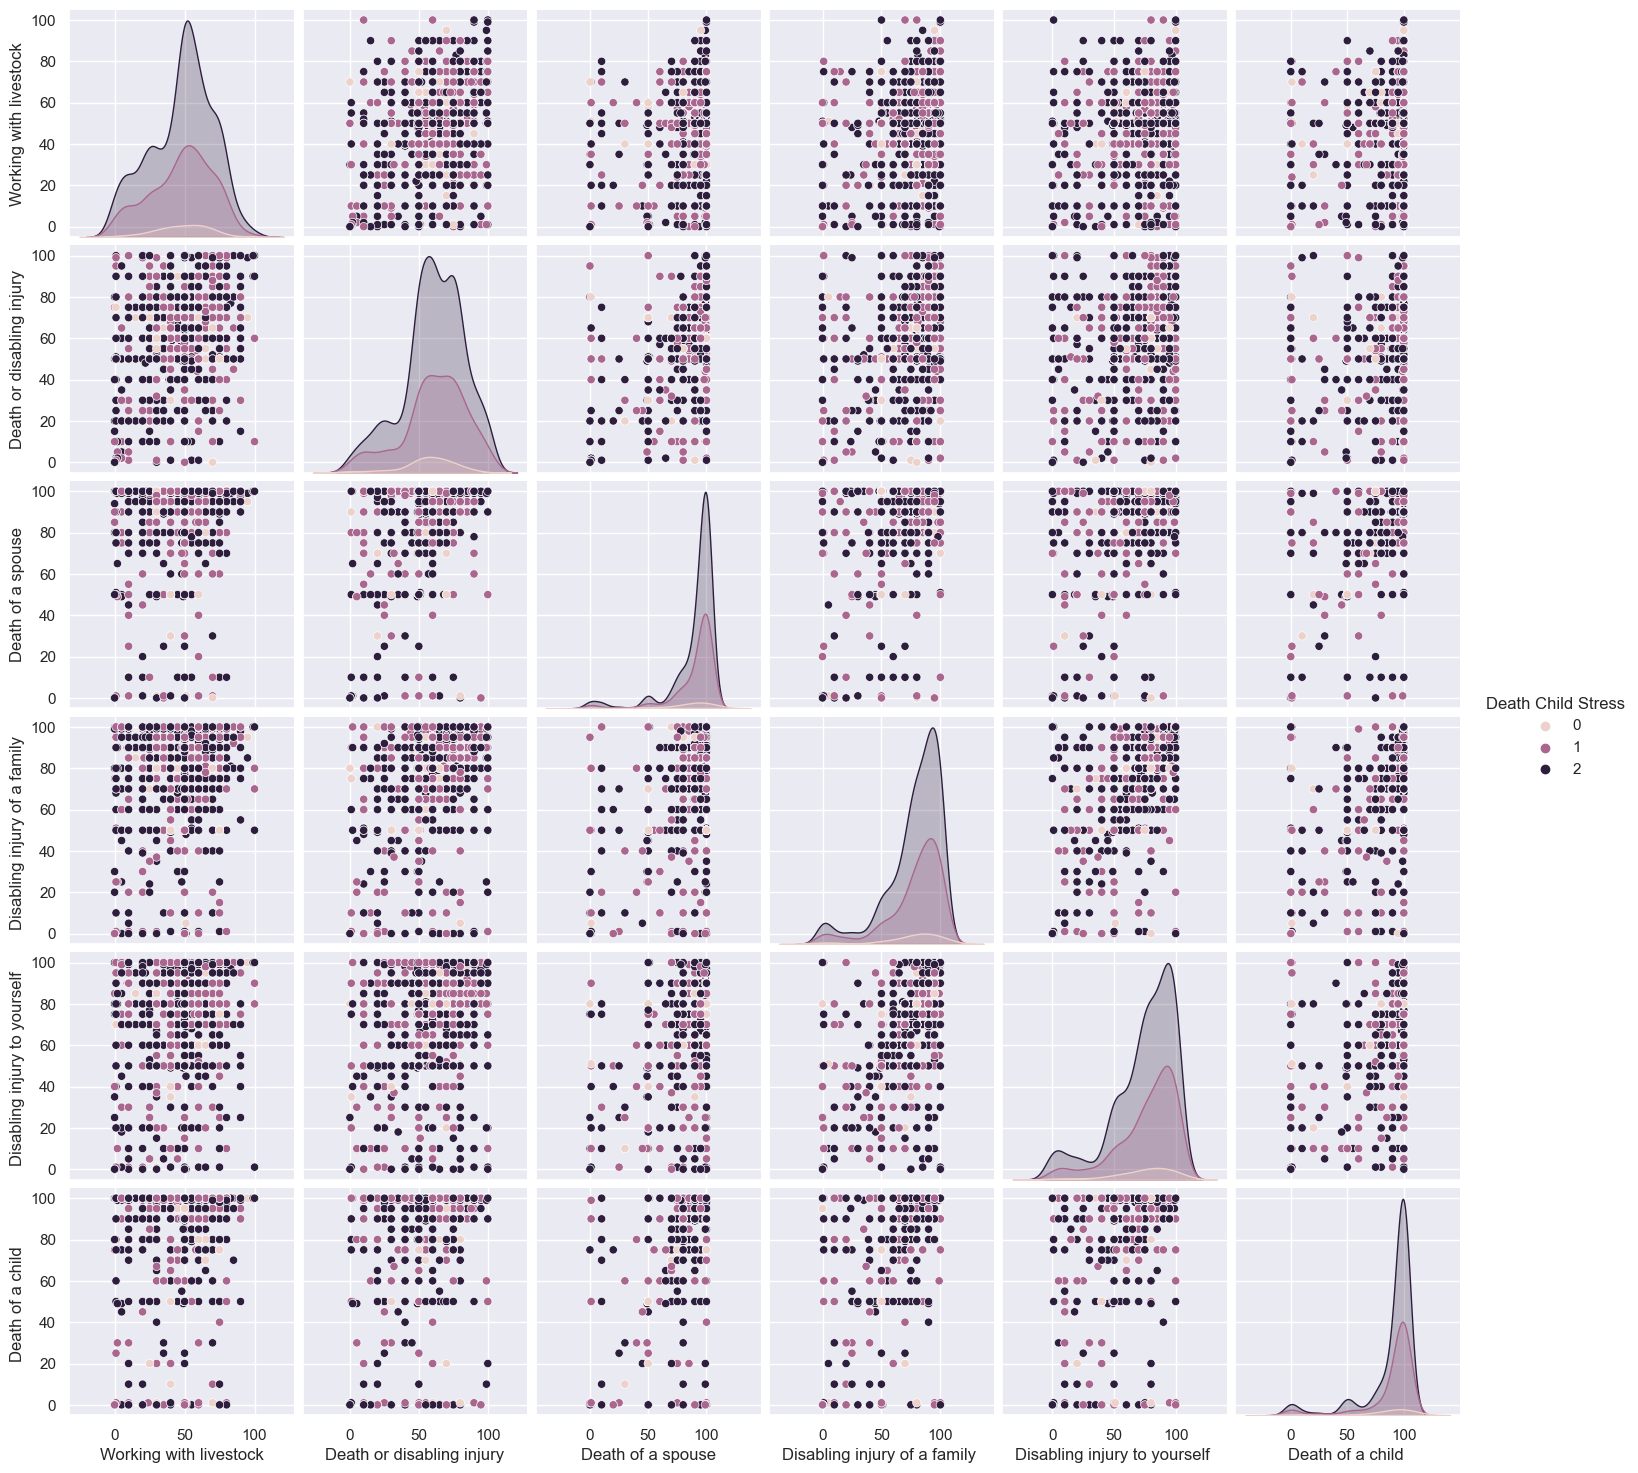

In [20]:
sns.pairplot(dataset, hue = 'Death Child Stress', vars = feature_names)

## Correlation
I used Pearson correlation, but it was hard to see because there are 62 life events, so I preferred to analyze the five objective variables with all the life events one by one.

<AxesSubplot:>

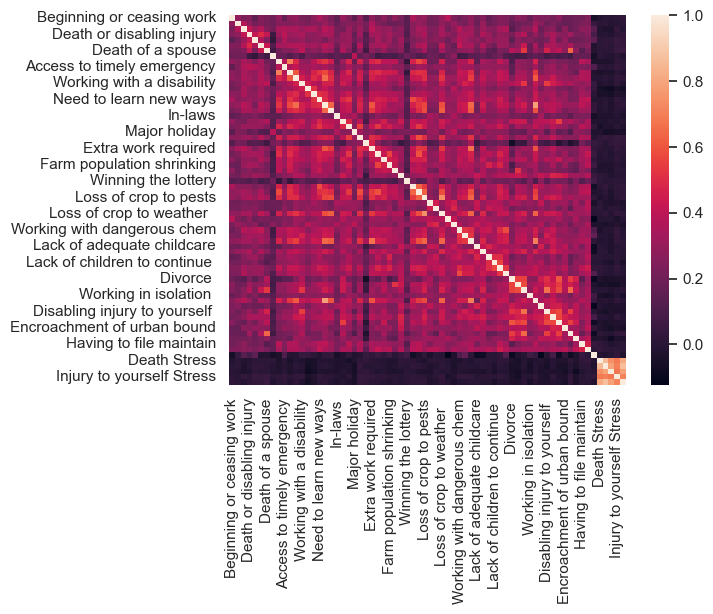

In [21]:
corr = dataset.corr(method='pearson')
sns.heatmap(corr)

 <h1>Model 1 </h1>
Does the death or disabling injury stressful or not stressful?

### Erase Death or disabling injury, Death Spouse Stress, Injury of a family Stress, Injury to yourself Stress, Death Child Stress column

In [22]:
dataset1 = dataset.drop(['Death or disabling injury','Death Spouse Stress', 'Injury of a family Stress','Injury to yourself Stress','Death Child Stress'], axis=1)
dataset1

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  West Nile virus  Assigning hazardous tasks  \
0                            50               60                         70   
1                            55               70                         60   
2                            90               95                         70   
4                            60               80                         65   
5                            30               15                         80   
...                         ...              ...                        ...   
1338                         60               60                         85   
1339                         40               50                         70   
1340                         10               10                         10   
1341                         60               60                         70   
1342                         60               40                         50   

      Death of a spouse  Vacation  Increased input prices  \
0                    90        20                      70   
1                    85         1                      69   
2                   100        60                      60   
4                   100        10                      60   
5                   100        30                      25   
...                 ...       ...                     ...   
1338                 95        10                      68   
1339                 95        25                      50   
1340                 10        10                      90   
1341                 95        60                      70   
1342                100        30                      63   

      Access to timely emergency  Machinery costs  ...  \
0                             60               60  ...   
1                             60               65  ...   
2                             60               80  ...   
4                             20               70  ...   
5                             15               80  ...   
...                          ...              ...  ...   
1338                          45               70  ...   
1339                          40               50  ...   
1340                          10               90  ...   
1341                          75               70  ...   
1342                          75               50  ...   

      Foreclosure on a mortgage  Encroachment of urban bound  \
0                            20                           85   
1                            80                           40   
2                            95                           60   
4                            85                           70   
5                            90                           70   
...                         ...                          ...   
1338                         98                           55   
1339                         90                           70   
1340                         90                           10   
1341                         85                           95   
1342                         80                           90   

      Death of a child   Sexual difficulties   Having to file maintain  \
0                    80                    20                       80   
1

In [23]:
X1=dataset1.drop('Death Stress', axis=1)
y1=dataset1['Death Stress']

 <h1>Model 1: Death stress predictor </h1>

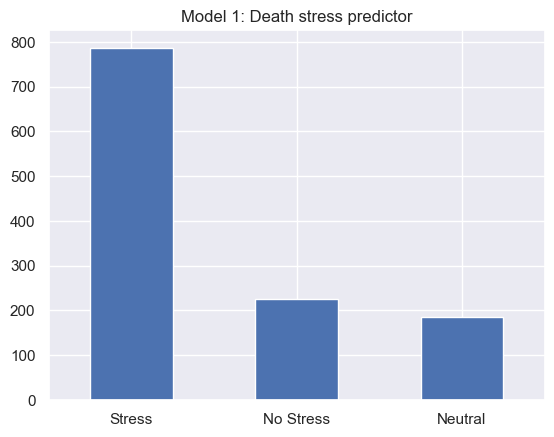

In [24]:
class_count = dataset['Death Stress'].value_counts().rename({0: "Neutral", 1: "No Stress", 2: "Stress"})

class_count.plot(
    kind='bar', 
    title=f'Model 1: Death stress predictor',
    rot=0
);

#### I can see here that there is no class imbalance. Thus, it is not necessary to do any other action.

### Model 1: Correlation
When I compare the death stress predictor, I can see that the only correlation is with life events such as the death of a spouse, death of a child, injury of a family, and injury to yourself. 

In [25]:
corr = dataset.corr()
corr
#show status correlation with the rest of the columns
corr['Death Stress'].sort_values(ascending=False).head(66)

Death Stress                     1.000000
Death Spouse Stress              0.851472
Death Child Stress               0.802776
Injury of a family Stress        0.740436
Injury to yourself Stress        0.688231
                                   ...   
Disabling injury to yourself    -0.035837
Working in isolation            -0.039501
Machinery costs                 -0.040911
Finding reliable help           -0.045622
Lack of health insurance        -0.051446
Name: Death Stress, Length: 66, dtype: float64

### Splitting the dataset into the Training set and Test set without the function Scaler

In [26]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.45, random_state=42)

In [27]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X1_train, y1_train)

SVC(C=2)

<AxesSubplot:>

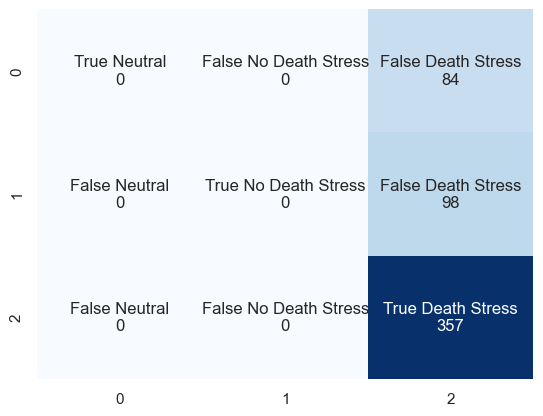

In [28]:
y1_pred = svc.predict(X1_test)

# Create the confusion matrix without the function Scaler
cf_matrix = confusion_matrix(y1_test, y1_pred)

group_names = ["True Neutral","False No Death Stress","False Death Stress","False Neutral", "True No Death Stress", "False Death Stress", "False Neutral", "False No Death Stress", "True Death Stress"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix,annot=labels,fmt='', cmap='Blues', cbar=False)

### Scaler function
I used the Scaler function because in my previous analysis, I did not use the function, and the model's performance was not good. The function is used to scale the dataset values, and it helps improve the model's performance.

In [29]:
X1=dataset1
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X1[:5]

array([[ 0.29274242, -1.03360459, -0.15682722,  0.66467997,  0.14652933,
         0.04001294, -0.69925327,  0.32374565,  0.50794092, -0.24597342,
        -0.12577749,  0.27622223, -0.07070843, -1.0942917 , -0.30139498,
        -0.99758295,  0.03386664, -0.50690855, -0.03815014,  0.28647995,
        -0.65605006,  0.59552664,  0.56823712, -0.48708213,  1.09404431,
         0.7153248 ,  1.05197117,  1.00261747, -1.18733519, -0.72217244,
         0.84019273, -0.23632783, -0.94241682, -0.78602514, -0.78164738,
        -0.01843674,  0.97694542, -0.63850626, -1.4955522 ,  0.5573241 ,
        -0.17493464, -0.63020097,  0.4789074 , -0.78515135, -0.83586031,
        -0.41999804,  0.71126712, -1.59124665,  0.07247551, -2.38688233,
        -0.79893329, -1.67351062, -1.00737199, -2.15599246, -1.28740532,
        -1.8299658 ,  1.05448121, -0.35709143, -1.20159637,  0.94041094,
         0.34288202,  0.7950302 ,  2.161709  ,  2.44904677,  0.66478165],
       [ 0.29274242,  0.09603338,  0.05820392,  1.

In [30]:
# Splitting the dataset into the Training set, Test set and Validation set

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
X1_train, X1_validation, y1_train, y1_validation = train_test_split(X1_train, y1_train, test_size=0.15, random_state=42)

In [31]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X1_train, y1_train)

SVC(C=2)

<AxesSubplot:>

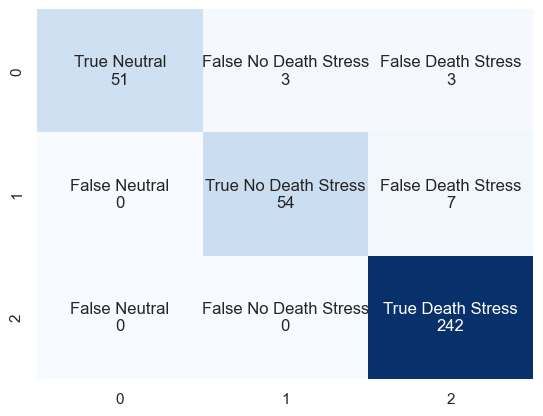

In [32]:
y1_pred = svc.predict(X1_test)

# Create the confusion matrix
cf_matrix = confusion_matrix(y1_test, y1_pred)

group_names = ["True Neutral","False No Death Stress","False Death Stress","False Neutral", "True No Death Stress", "False Death Stress", "False Neutral", "False No Death Stress", "True Death Stress"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix,annot=labels,fmt='', cmap='Blues', cbar=False)

#### The model performance has improved by using the scaler function. A scaler function helps to address the different units of the data set, such as age, marital status, and gender, by transforming the data to a common scale.

In [33]:
# Test Death Stress

print("Accuracy: ", accuracy_score(y1_test, y1_pred))
print("Classification Report: \n", classification_report(y1_test, y1_pred))

Accuracy:  0.9638888888888889
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.89      0.94        57
           1       0.95      0.89      0.92        61
           2       0.96      1.00      0.98       242

    accuracy                           0.96       360
   macro avg       0.97      0.93      0.95       360
weighted avg       0.96      0.96      0.96       360



#### Based on the Death Stressor predictor report, the model appeared to perform well overall, with high precision, recall, and f1-score values. 

 <h1>Model 2 </h1>
Does the death of a spouse stressful or not stressful?

## Erase Death of a spouse, Death Stress,  Injury of a family Stress, Injury to yourself Stress, Death Child Stress column

In [34]:
dataset

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Death of a spouse  Vacation  \
0                            70                 90        20   
1                            60                 85         1   
2                            70                100        60   
4                            65                100        10   
5                            80                100        30   
...                         ...                ...       ...   
1338                         85                 95        10   
1339                         70                 95        25   
1340                         10                 10        10   
1341                         70                 95        60   
1342                         50                100        30   

      Increased input prices  Access to timely emergency  ...  \
0                         70                          60  ...   
1                         69                          60  ...   
2                         60                          60  ...   
4                         60                          20  ...   
5                         25                          15  ...   
...                      ...                         ...  ...   
1338                      68                          45  ...   
1339                      50                          40  ...   
1340                      90                          10  ...   
1341                      70                          75  ...   
1342                      63                          75  ...   

      Having to file maintain  Vertical integration of farm  Age  Gender  \
0                          80                            60   65       2   
1                          60                            60   72       1   
2                          60                            95   43       2   
4                          50                            40   50       2   
5                          20                            50   60       2   
...                       ...                           ...  ...     ...   
1338                       85                            62   47       1   
1339                       60                            60   49       1   
1340                       10                            10   42       2   
1341                       65         

 <h1>Model 2: Death of a spouse stress predictor</h1>

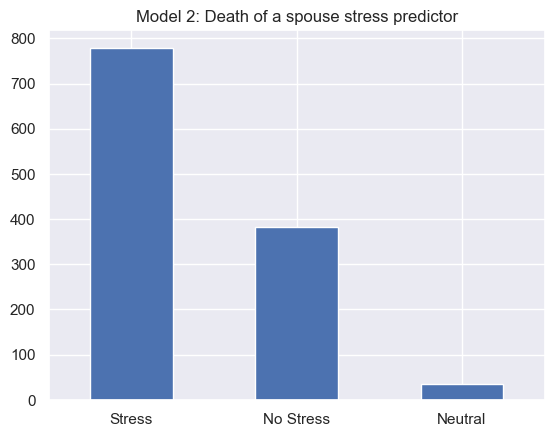

In [35]:
class_count = dataset['Death Spouse Stress'].value_counts().rename({0: "Neutral", 1: "No Stress", 2: "Stress"})

class_count.plot(
    kind='bar', 
    title=f'Model 2: Death of a spouse stress predictor',
    rot=0
);

#### I can see here that there is a class imbalance. Thus, it was necessary to balance it.

### Model 2: Correlation
When I compare the death of a spouse stress predictor, I can see that the only correlation is with life events such as the death stress, death of a child, injury of a family, and injury to yourself.

In [36]:
corr = dataset.corr()
corr
#show status correlation with the rest of the columns
corr['Death Spouse Stress'].sort_values(ascending=False).head(66)

Death Spouse Stress              1.000000
Death Child Stress               0.866071
Death Stress                     0.851472
Injury of a family Stress        0.792626
Injury to yourself Stress        0.698882
                                   ...   
Foreclosure on a mortgage       -0.043618
Divorce                         -0.045611
Finding reliable help           -0.048658
Disabling injury to yourself    -0.049501
Working in isolation            -0.055129
Name: Death Spouse Stress, Length: 66, dtype: float64

In [37]:
dataset2 = dataset.drop(['Death of a spouse','Death Stress', 'Injury of a family Stress', 'Injury to yourself Stress','Death Child Stress'], axis=1)
dataset2

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Vacation  Increased input prices  \
0                            70        20                      70   
1                            60         1                      69   
2                            70        60                      60   
4                            65        10                      60   
5                            80        30                      25   
...                         ...       ...                     ...   
1338                         85        10                      68   
1339                         70        25                      50   
1340                         10        10                      90   
1341                         70        60                      70   
1342                         50        30                      63   

      Access to timely emergency  Machinery costs  ...  \
0                             60               60  ...   
1                             60               65  ...   
2                             60               80  ...   
4                             20               70  ...   
5                             15               80  ...   
...                          ...              ...  ...   
1338                          45               70  ...   
1339                          40               50  ...   
1340                          10               90  ...   
1341                          75               70  ...   
1342                          75               50  ...   

      Foreclosure on a mortgage  Encroachment of urban bound  \
0                            20                           85   
1                            80                           40   
2                            95                           60   
4                            85                           70   
5                            90                           70   
...                         ...                          ...   
1338                         98                           55   
1339                         90                           70   
1340                         90                           10   
1341                         85                           95   
1342                         80                           90   

      Death of a child   Sexual difficulties   Having

In [38]:
X2=dataset2.drop('Death Spouse Stress', axis=1)
y2=dataset2['Death Spouse Stress']

In [39]:
X2=dataset2
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)
X2[:5]

array([[ 0.29274242, -1.03360459, -0.15682722, -0.02704446,  0.66467997,
         0.14652933, -0.69925327,  0.32374565,  0.50794092, -0.24597342,
        -0.12577749,  0.27622223, -0.07070843, -1.0942917 , -0.30139498,
        -0.99758295,  0.03386664, -0.50690855, -0.03815014,  0.28647995,
        -0.65605006,  0.59552664,  0.56823712, -0.48708213,  1.09404431,
         0.7153248 ,  1.05197117,  1.00261747, -1.18733519, -0.72217244,
         0.84019273, -0.23632783, -0.94241682, -0.78602514, -0.78164738,
        -0.01843674,  0.97694542, -0.63850626, -1.4955522 ,  0.5573241 ,
        -0.17493464, -0.63020097,  0.4789074 , -0.78515135, -0.83586031,
        -0.41999804,  0.71126712, -1.59124665,  0.07247551, -2.38688233,
        -0.79893329, -1.67351062, -1.00737199, -2.15599246, -1.28740532,
        -1.8299658 ,  1.05448121, -0.35709143, -1.20159637,  0.94041094,
         0.34288202,  0.7950302 ,  2.161709  ,  2.44904677,  0.69763148],
       [ 0.29274242,  0.09603338,  0.05820392, -0.

## Undersampling for Model 2 

First, I tried the following algorithm:

from imblearn.under_sampling import RandomUnderSampler

X_test is your feature matrix and y_test is the corresponding target variable

rus = RandomUnderSampler(random_state=20)

X_resampled, y_resampled = rus.fit_resample(X2, y2)

print(X_resampled, y_resampled)

Accuracy:  0.7575757575757576
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.56      1.00      0.71        10
           2       1.00      0.64      0.78        11

    accuracy                           0.76        33
   macro avg       0.85      0.77      0.76        33
weighted avg       0.87      0.76      0.77        33

The metrics could have been better than I expected. Therefore, I decided to use another method, which is SMOTE algorithm.

## SMOTE Algorithm for Model 2  
SMOTE is a synthetic minority over-sampling technique, which can help me with imbalanced classification issues. In this case, the "neutral" class was the minority class, and SMOTE algorithm helped generate synthetic samples for the neutral class. Therefore, the class balance would improve.  

In [40]:
X_resampled, y_resampled = SMOTE().fit_resample(X2, y2)

In [41]:
# Splitting the dataset into the Training set, Test set and Validation set

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
X2_train, X2_test, y2_train, y2_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X2_train, X2_validation, y2_train, y2_validation = train_test_split(X2_train, y2_train, test_size=0.15, random_state=42)

In [42]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X2_train, y2_train)

SVC(C=2)

<AxesSubplot:>

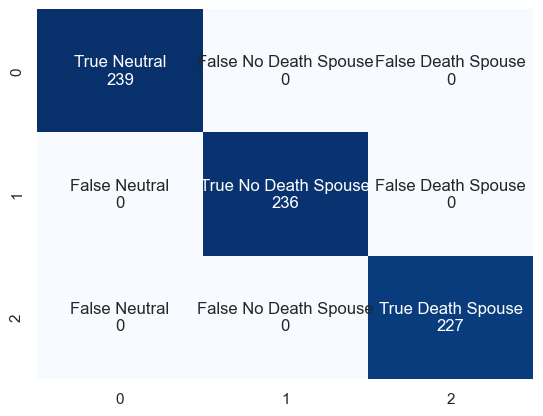

In [43]:
y2_pred = svc.predict(X2_test)

# Create the confusion matrix
cf_matrix = confusion_matrix(y2_test, y2_pred)

group_names = ["True Neutral","False No Death Spouse","False Death Spouse","False Neutral", "True No Death Spouse", "False Death Spouse", "False Neutral", "False No Death Spouse", "True Death Spouse"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix,annot=labels,fmt='', cmap='Blues', cbar=False)

In [44]:
# Test Death Spouse Stress

print("Accuracy: ", accuracy_score(y2_test, y2_pred))
print("Classification Report: \n", classification_report(y2_test, y2_pred))

Accuracy:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       236
           2       1.00      1.00      1.00       227

    accuracy                           1.00       702
   macro avg       1.00      1.00      1.00       702
weighted avg       1.00      1.00      1.00       702



#### Based on the Death spouse stressor predictor report, the model appeared to perform well overall, with high precision, recall, and f1-score values by using SMOTE algorithm. 

 <h1>Model 3 </h1>
Does injury of a family stressful or not stressful?

### Erase Disabling injury of a family , Death Stress, Death Spouse Stress,  Injury to yourself Stress, Death Child Stress column

In [45]:
dataset

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Death of a spouse  Vacation  \
0                            70                 90        20   
1                            60                 85         1   
2                            70                100        60   
4                            65                100        10   
5                            80                100        30   
...                         ...                ...       ...   
1338                         85                 95        10   
1339                         70                 95        25   
1340                         10                 10        10   
1341                         70                 95        60   
1342                         50                100        30   

      Increased input prices  Access to timely emergency  ...  \
0                         70                          60  ...   
1                         69                          60  ...   
2                         60                          60  ...   
4                         60                          20  ...   
5                         25                          15  ...   
...                      ...                         ...  ...   
1338                      68                          45  ...   
1339                      50                          40  ...   
1340                      90                          10  ...   
1341                      70                          75  ...   
1342                      63                          75  ...   

      Having to file maintain  Vertical integration of farm  Age  Gender  \
0                          80                            60   65       2   
1                          60                            60   72       1   
2                          60                            95   43       2   
4                          50                            40   50       2   
5                          20                            50   60       2   
...                       ...                           ...  ...     ...   
1338                       85                            62   47       1   
1339                       60                            60   49       1   
1340                       10                            10   42       2   
1341                       65         

<h1> Model 3: Injury of a family stress predictor </h1>

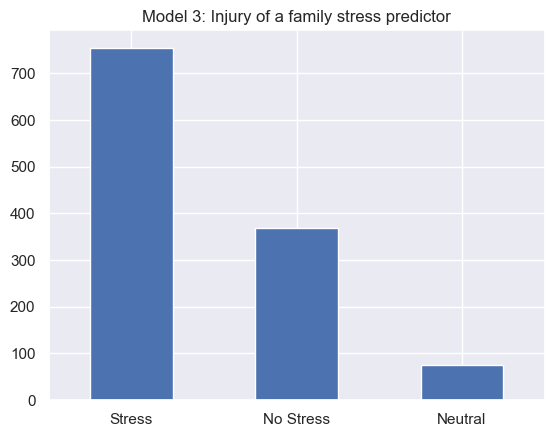

In [46]:
class_count = dataset['Injury of a family Stress'].value_counts().rename({0: "Neutral", 1: "No Stress", 2: "Stress"})

class_count.plot(
    kind='bar', 
    title=f'Model 3: Injury of a family stress predictor',
    rot=0
);

#### I can see here that there is a class imbalance. Thus, it was necessary to balance it using SMOTE or another algorithm.

### Model 3: Correlation

When I compare the injury of a family stress predictor, I can see that the only correlation is with life events such as the death spouse stress, death of a child, death, and injury to yourself.

In [47]:
corr = dataset.corr()
corr
#show status correlation with the rest of the columns
corr['Injury of a family Stress'].sort_values(ascending=False).head(66)

Injury of a family Stress      1.000000
Death Spouse Stress            0.792626
Death Child Stress             0.783790
Death Stress                   0.740436
Injury to yourself Stress      0.678086
                                 ...   
Working in isolation          -0.045608
Encroachment of urban bound   -0.055430
Finding reliable help         -0.057267
Major holiday                 -0.057551
Lack of health insurance      -0.060615
Name: Injury of a family Stress, Length: 66, dtype: float64

In [48]:
dataset3 = dataset.drop(['Disabling injury of a family ','Death Stress','Death Spouse Stress', 'Injury to yourself Stress','Death Child Stress'], axis=1)
dataset3

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Death of a spouse  Vacation  \
0                            70                 90        20   
1                            60                 85         1   
2                            70                100        60   
4                            65                100        10   
5                            80                100        30   
...                         ...                ...       ...   
1338                         85                 95        10   
1339                         70                 95        25   
1340                         10                 10        10   
1341                         70                 95        60   
1342                         50                100        30   

      Increased input prices  Access to timely emergency  ...  \
0                         70                          60  ...   
1                         69                          60  ...   
2                         60                          60  ...   
4                         60                          20  ...   
5                         25                          15  ...   
...                      ...                         ...  ...   
1338                      68                          45  ...   
1339                      50                          40  ...   
1340                      90                          10  ...   
1341                      70                          75  ...   
1342                      63                          75  ...   

      Foreclosure on a mortgage  Encroachment of urban bound  \
0                            20                           85   
1                            80                           40   
2                            95                           60   
4                            85                           70   
5                            90                           70   
...                         ...                          ...   
1338                         98                           55   
1339                         90                           70   
1340                         90                           10   
1341                         85                           95   
1342                         80                           90   

      Death of a child   Sexu

In [49]:
X3=dataset3.drop('Injury of a family Stress', axis=1)
y3=dataset3['Injury of a family Stress']

In [50]:
X3=dataset3
scaler = StandardScaler()
X3 = scaler.fit_transform(X3)
X3[:5]

array([[ 0.29274242, -1.03360459, -0.15682722, -0.02704446,  0.66467997,
         0.14652933,  0.04001294, -0.69925327,  0.32374565,  0.50794092,
        -0.24597342, -0.12577749,  0.27622223, -0.07070843, -1.0942917 ,
        -0.30139498, -0.99758295,  0.03386664, -0.50690855, -0.03815014,
         0.28647995, -0.65605006,  0.59552664,  0.56823712, -0.48708213,
         1.09404431,  0.7153248 ,  1.05197117,  1.00261747, -1.18733519,
        -0.72217244,  0.84019273, -0.23632783, -0.94241682, -0.78602514,
        -0.78164738, -0.01843674,  0.97694542, -0.63850626, -1.4955522 ,
         0.5573241 , -0.17493464, -0.63020097,  0.4789074 , -0.78515135,
        -0.83586031, -0.41999804,  0.71126712, -1.59124665,  0.07247551,
        -0.79893329, -1.67351062, -1.00737199, -2.15599246, -1.28740532,
        -1.8299658 ,  1.05448121, -0.35709143, -1.20159637,  0.94041094,
         0.34288202,  0.7950302 ,  2.161709  ,  2.44904677,  0.70975072],
       [ 0.29274242,  0.09603338,  0.05820392, -0.

## SMOTE Algorithm for Model 3 
I prefer the SMOTE algorithm because the undersampling technique failed in my previous model. Like model 2, the "neutral" class was the minority class. 

In [51]:
X_resampled, y_resampled = SMOTE().fit_resample(X3, y3)

In [52]:
# Splitting the dataset into the Training set, Test set and Validation set

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
X3_train, X3_test, y3_train, y3_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X3_train, X3_validation, y3_train, y3_validation = train_test_split(X3_train, y3_train, test_size=0.15, random_state=42)

In [53]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X3_train, y3_train)

SVC(C=2)

<AxesSubplot:>

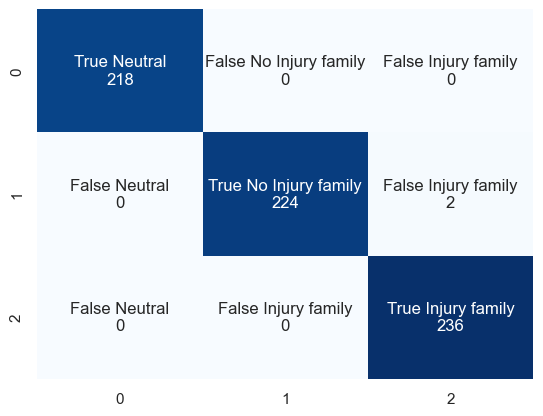

In [54]:
y3_pred = svc.predict(X3_test)

# Create the confusion matrix
cf_matrix = confusion_matrix(y3_test, y3_pred)

group_names = ["True Neutral","False No Injury family","False Injury family","False Neutral", "True No Injury family", "False Injury family", "False Neutral", "False Injury family", "True Injury family"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix,annot=labels,fmt='', cmap='Blues', cbar=False)

In [55]:
# Test Death No Injury of a family Stress

print("Accuracy: ", accuracy_score(y3_test, y3_pred))
print("Classification Report: \n", classification_report(y3_test, y3_pred))

Accuracy:  0.9970588235294118
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       218
           1       1.00      0.99      1.00       226
           2       0.99      1.00      1.00       236

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



#### After applying SMOTE algorithm to model 3, the model performance appeared to be better than without synthetic samples.

 <h1>Model 4</h1>
Does injury to yourself stressful or not stressful?

### Erase Disabling injury to yourself , Death Stress, Death Spouse Stress, Injury of a family Stress, Death Child Stress column

In [56]:
dataset

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Death of a spouse  Vacation  \
0                            70                 90        20   
1                            60                 85         1   
2                            70                100        60   
4                            65                100        10   
5                            80                100        30   
...                         ...                ...       ...   
1338                         85                 95        10   
1339                         70                 95        25   
1340                         10                 10        10   
1341                         70                 95        60   
1342                         50                100        30   

      Increased input prices  Access to timely emergency  ...  \
0                         70                          60  ...   
1                         69                          60  ...   
2                         60                          60  ...   
4                         60                          20  ...   
5                         25                          15  ...   
...                      ...                         ...  ...   
1338                      68                          45  ...   
1339                      50                          40  ...   
1340                      90                          10  ...   
1341                      70                          75  ...   
1342                      63                          75  ...   

      Having to file maintain  Vertical integration of farm  Age  Gender  \
0                          80                            60   65       2   
1                          60                            60   72       1   
2                          60                            95   43       2   
4                          50                            40   50       2   
5                          20                            50   60       2   
...                       ...                           ...  ...     ...   
1338                       85                            62   47       1   
1339                       60                            60   49       1   
1340                       10                            10   42       2   
1341                       65         

<h1> Model 4: Injury to yourself stress predictor </h1>

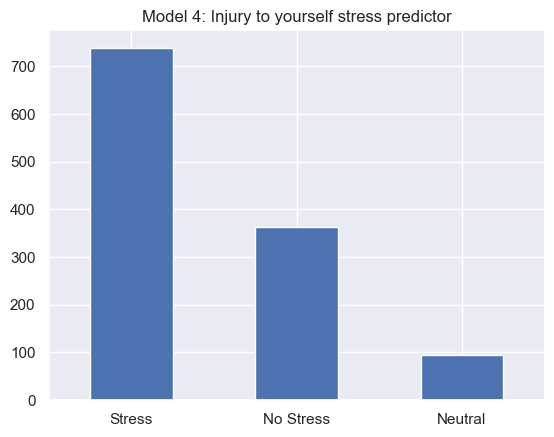

In [57]:
class_count = dataset['Injury to yourself Stress'].value_counts().rename({0: "Neutral", 1: "No Stress", 2: "Stress"})

class_count.plot(
    kind='bar', 
    title=f'Model 4: Injury to yourself stress predictor',
    rot=0
);

#### In this case, I did not use a method to balance the class because when I used the SVC algorithm was better than I expected. Details will be explained below.

In [58]:
dataset4 = dataset.drop(['Disabling injury to yourself ','Death Stress','Death Spouse Stress', 'Injury of a family Stress','Death Child Stress'], axis=1)
dataset4

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Death of a spouse  Vacation  \
0                            70                 90        20   
1                            60                 85         1   
2                            70                100        60   
4                            65                100        10   
5                            80                100        30   
...                         ...                ...       ...   
1338                         85                 95        10   
1339                         70                 95        25   
1340                         10                 10        10   
1341                         70                 95        60   
1342                         50                100        30   

      Increased input prices  Access to timely emergency  ...  \
0                         70                          60  ...   
1                         69                          60  ...   
2                         60                          60  ...   
4                         60                          20  ...   
5                         25                          15  ...   
...                      ...                         ...  ...   
1338                      68                          45  ...   
1339                      50                          40  ...   
1340                      90                          10  ...   
1341                      70                          75  ...   
1342                      63                          75  ...   

      Foreclosure on a mortgage  Encroachment of urban bound  \
0                            20                           85   
1                            80                           40   
2                            95                           60   
4                            85                           70   
5                            90                           70   
...                         ...                          ...   
1338                         98                           55   
1339                         90                           70   
1340                         90                           10   
1341                         85                           95   
1342                         80                           90   

      Death of a child   Sexu

In [59]:
X4=dataset4.drop('Injury to yourself Stress', axis=1)
y4=dataset4['Injury to yourself Stress']

In [60]:
X4=dataset4
scaler = StandardScaler()
X4 = scaler.fit_transform(X4)
X4[:5]

array([[ 0.29274242, -1.03360459, -0.15682722, -0.02704446,  0.66467997,
         0.14652933,  0.04001294, -0.69925327,  0.32374565,  0.50794092,
        -0.24597342, -0.12577749,  0.27622223, -0.07070843, -1.0942917 ,
        -0.30139498, -0.99758295,  0.03386664, -0.50690855, -0.03815014,
         0.28647995, -0.65605006,  0.59552664,  0.56823712, -0.48708213,
         1.09404431,  0.7153248 ,  1.05197117,  1.00261747, -1.18733519,
        -0.72217244,  0.84019273, -0.23632783, -0.94241682, -0.78602514,
        -0.78164738, -0.01843674,  0.97694542, -0.63850626, -1.4955522 ,
         0.5573241 , -0.17493464, -0.63020097,  0.4789074 , -0.78515135,
        -0.83586031, -0.41999804,  0.71126712, -1.59124665,  0.07247551,
        -2.38688233, -0.79893329, -1.67351062, -1.00737199, -1.28740532,
        -1.8299658 ,  1.05448121, -0.35709143, -1.20159637,  0.94041094,
         0.34288202,  0.7950302 ,  2.161709  ,  2.44904677,  0.72390509],
       [ 0.29274242,  0.09603338,  0.05820392, -0.

### Model 4: Correlation

When I compare the injury to yourself stress predictor, I can see that the only correlation is with life events such as the death spouse stress, death of a child, death, and injury of a family.

In [61]:
corr = dataset.corr()
corr
#show status correlation with the rest of the columns
corr['Injury to yourself Stress'].sort_values(ascending=False).head(66)

Injury to yourself Stress        1.000000
Death Child Stress               0.709645
Death Spouse Stress              0.698882
Death Stress                     0.688231
Injury of a family Stress        0.678086
                                   ...   
Sexual difficulties             -0.029051
Spouse begin or cease work      -0.035774
Disabling injury to yourself    -0.036490
Divorce                         -0.037580
Having to ask a neighbor        -0.043907
Name: Injury to yourself Stress, Length: 66, dtype: float64

In [62]:
# Splitting the dataset into the Training set, Test set and Validation set

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=42)
X4_train, X4_validation, y4_train, y4_validation = train_test_split(X4_train, y4_train, test_size=0.15, random_state=42)

In [63]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X4_train, y4_train)

SVC(C=2)

<AxesSubplot:>

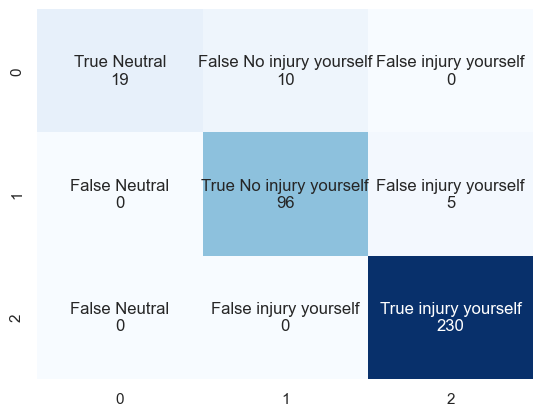

In [64]:
y4_pred = svc.predict(X4_test)

# Create the confusion matrix
cf_matrix = confusion_matrix(y4_test, y4_pred)

group_names = ["True Neutral","False No injury yourself","False injury yourself","False Neutral", "True No injury yourself", "False injury yourself", "False Neutral", "False injury yourself", "True injury yourself"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix,annot=labels,fmt='', cmap='Blues', cbar=False)

In [65]:
# Test Injury to yourself Stress

print("Accuracy: ", accuracy_score(y4_test, y4_pred))
print("Classification Report: \n", classification_report(y4_test, y4_pred))

Accuracy:  0.9583333333333334
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.66      0.79        29
           1       0.91      0.95      0.93       101
           2       0.98      1.00      0.99       230

    accuracy                           0.96       360
   macro avg       0.96      0.87      0.90       360
weighted avg       0.96      0.96      0.96       360



#### The results showed that the precision was accurate, and the only problem was the recall for the neutral class (0), indicating that the model may struggle to correctly identify instances in this class (0.66).

 <h1>Model 5: Death of a child stress predictor </h1>
Does the death of a child stressful or not stressful?

### Erase Death of a child, Death Stress, Injury of a family Stress, Injury to yourself Stress, Death Spouse Stress column

In [66]:
dataset

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Death of a spouse  Vacation  \
0                            70                 90        20   
1                            60                 85         1   
2                            70                100        60   
4                            65                100        10   
5                            80                100        30   
...                         ...                ...       ...   
1338                         85                 95        10   
1339                         70                 95        25   
1340                         10                 10        10   
1341                         70                 95        60   
1342                         50                100        30   

      Increased input prices  Access to timely emergency  ...  \
0                         70                          60  ...   
1                         69                          60  ...   
2                         60                          60  ...   
4                         60                          20  ...   
5                         25                          15  ...   
...                      ...                         ...  ...   
1338                      68                          45  ...   
1339                      50                          40  ...   
1340                      90                          10  ...   
1341                      70                          75  ...   
1342                      63                          75  ...   

      Having to file maintain  Vertical integration of farm  Age  Gender  \
0                          80                            60   65       2   
1                          60                            60   72       1   
2                          60                            95   43       2   
4                          50                            40   50       2   
5                          20                            50   60       2   
...                       ...                           ...  ...     ...   
1338                       85                            62   47       1   
1339                       60                            60   49       1   
1340                       10                            10   42       2   
1341                       65         

<h1> Model 5: Death of a child stress predictor </h1>

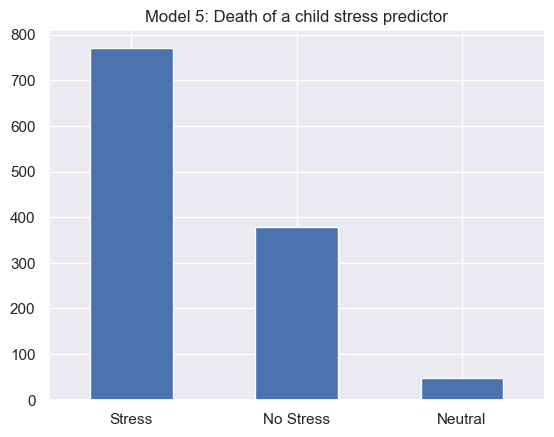

In [67]:
class_count = dataset['Death Child Stress'].value_counts().rename({0: "Neutral", 1: "No Stress", 2: "Stress"})

class_count.plot(
    kind='bar', 
    title=f'Model 5: Death of a child stress predictor',
    rot=0
);

#### Same as model 4, after analyzing the results of SVC, it was not necessary to apply another method as undersampling or oversampling.

In [68]:
dataset5 = dataset.drop(['Death of a child ','Death Stress', 'Injury of a family Stress', 'Injury to yourself Stress','Death Spouse Stress'], axis=1)
dataset5

Beginning or ceasing work  Working with livestock  \
0                            60                      25   
1                            60                      50   
2                            70                      60   
4                            75                      55   
5                            50                      30   
...                         ...                     ...   
1338                         70                      30   
1339                         60                      50   
1340                        100                      10   
1341                         40                      60   
1342                         50                      90   

      Transporting agricultural  Death or disabling injury  West Nile virus  \
0                            50                         60               60   
1                            55                         57               70   
2                            90                         85               95   
4                            60                         70               80   
5                            30                         20               15   
...                         ...                        ...              ...   
1338                         60                         65               60   
1339                         40                         60               50   
1340                         10                         10               10   
1341                         60                         60               60   
1342                         60                        100               40   

      Assigning hazardous tasks  Death of a spouse  Vacation  \
0                            70                 90        20   
1                            60                 85         1   
2                            70                100        60   
4                            65                100        10   
5                            80                100        30   
...                         ...                ...       ...   
1338                         85                 95        10   
1339                         70                 95        25   
1340                         10                 10        10   
1341                         70                 95        60   
1342                         50                100        30   

      Increased input prices  Access to timely emergency  ...  \
0                         70                          60  ...   
1                         69                          60  ...   
2                         60                          60  ...   
4                         60                          20  ...   
5                         25                          15  ...   
...                      ...                         ...  ...   
1338                      68                          45  ...   
1339                      50                          40  ...   
1340                      90                          10  ...   
1341                      70                          75  ...   
1342                      63                          75  ...   

      Costly power outages   Foreclosure on a mortgage  \
0                        20                         20   
1                        60                         80   
2                        75                         95   
4                        75                         85   
5                        50                         90   
...                     ...                        ...   
1338                     55                         98   
1339                     60                         90   
1340                     10                         90   
1341                     85                         85   
1342                     60                         80   

      Encroachment of urban bound  Sexual difficulties   \
0                              85         

In [69]:
X5=dataset5.drop('Death Child Stress', axis=1)
y5=dataset5['Death Child Stress']

In [70]:
X5=dataset5
scaler = StandardScaler()
X5 = scaler.fit_transform(X5)
X5[:5]

array([[ 0.29274242, -1.03360459, -0.15682722, -0.02704446,  0.66467997,
         0.14652933,  0.04001294, -0.69925327,  0.32374565,  0.50794092,
        -0.24597342, -0.12577749,  0.27622223, -0.07070843, -1.0942917 ,
        -0.30139498, -0.99758295,  0.03386664, -0.50690855, -0.03815014,
         0.28647995, -0.65605006,  0.59552664,  0.56823712, -0.48708213,
         1.09404431,  0.7153248 ,  1.05197117,  1.00261747, -1.18733519,
        -0.72217244,  0.84019273, -0.23632783, -0.94241682, -0.78602514,
        -0.78164738, -0.01843674,  0.97694542, -0.63850626, -1.4955522 ,
         0.5573241 , -0.17493464, -0.63020097,  0.4789074 , -0.78515135,
        -0.83586031, -0.41999804,  0.71126712, -1.59124665,  0.07247551,
        -2.38688233, -0.79893329, -1.67351062, -1.00737199, -2.15599246,
        -1.28740532, -1.8299658 ,  1.05448121, -1.20159637,  0.94041094,
         0.34288202,  0.7950302 ,  2.161709  ,  2.44904677,  0.70124497],
       [ 0.29274242,  0.09603338,  0.05820392, -0.

### Model 5: Correlation

When I compare the death of a child stress predictor, I can see that the only correlation is with life events such as the death spouse stress, death, injury of a family, and injury to yourself Stress.

In [71]:
corr = dataset.corr()
corr
#show status correlation with the rest of the columns
corr['Death Child Stress'].sort_values(ascending=False).head(66)

Death Child Stress               1.000000
Death Spouse Stress              0.866071
Death Stress                     0.802776
Injury of a family Stress        0.783790
Injury to yourself Stress        0.709645
                                   ...   
Sexual difficulties             -0.036629
Neighbor asking assistance      -0.037024
Lack of children to continue    -0.041912
Major holiday                   -0.044667
Encroachment of urban bound     -0.046759
Name: Death Child Stress, Length: 66, dtype: float64

In [72]:
# Splitting the dataset into the Training set, Test set and Validation set

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=42)
X5_train, X5_validation, y5_train, y5_validation = train_test_split(X5_train, y5_train, test_size=0.15, random_state=42)

In [73]:
svc =  SVC(kernel='rbf', C=2)
svc.fit(X5_train, y5_train)

SVC(C=2)

<AxesSubplot:>

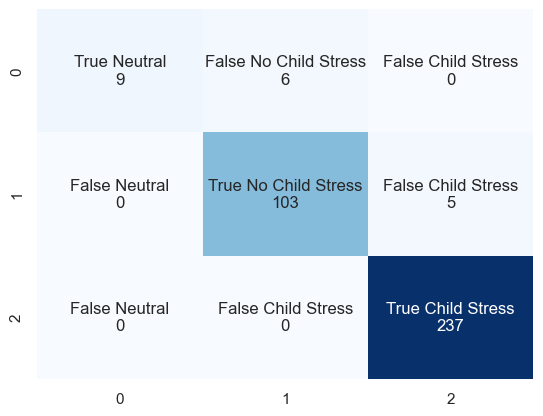

In [74]:
y5_pred = svc.predict(X5_test)

# Create the confusion matrix
cf_matrix = confusion_matrix(y5_test, y5_pred)

group_names = ["True Neutral","False No Child Stress","False Child Stress","False Neutral", "True No Child Stress", "False Child Stress", "False Neutral", "False Child Stress", "True Child Stress"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(3,3)

# Create a heatmap of the confusion matrix
sns.heatmap(cf_matrix,annot=labels,fmt='', cmap='Blues', cbar=False)

In [75]:
# Test Death Child Stress

print("Accuracy: ", accuracy_score(y5_test, y5_pred))
print("Classification Report: \n", classification_report(y5_test, y5_pred))

Accuracy:  0.9694444444444444
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75        15
           1       0.94      0.95      0.95       108
           2       0.98      1.00      0.99       237

    accuracy                           0.97       360
   macro avg       0.97      0.85      0.90       360
weighted avg       0.97      0.97      0.97       360



#### Similar to model 4, the results showed that the precision was accurate, and the only problem was the recall for the neutral class (0), indicating that the model may struggle to correctly identify instances in this class (0.60).

### In conclusion, death and injury stressors are the most stressful life events. Thus, the five research questions were answered as "yes," respectively.

<h1> Discussion </h1>

I learned that it is important to clean the data; if I cleaned, I could avoid noise from the data.
One disadvantage of machine learning is that I must prove several methods to understand which model performs better. For example, oversampling performed better than undersampling. 
Advantages that I learned about the precision of the model, and after I used several research methods or concepts, I learned that it is only sometimes necessary to use oversampling or undersampling (model 4 and model 5 did not use it).
In the future, I can use the project because I will do a similar study with new data that I can input into the database I already have, and I will start to analyze if the results are the same or not as the Survey from 2004. 
I don't know if I can store the data that I have and if I will collect it on a public site because I'm working with subjects and their personal information.